## Лабораторная работа 6
### Анна Гаврилина
### Вариант 6

## Задача 6.1.6

In [15]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# условие задачи
c = np.array([2.5, -2.1, 0, 0.4, 0.5])
a = 1.
b = 1.44
h = b - a

In [16]:
def P(x):
    return 2.5 + -2.1 * x + 0.4 * x**3 + 0.5 * x**4

Аналитическое решение

In [22]:
Integral = 0.821875

Формула трапеций и формула Симпсона

In [18]:
def trapezoidal(a, b, h) :
    x = np.linspace(a, b, round((b - a) / h) + 1)
    i = (P(x[0]) + P(x[-1])) / 2 + np.sum(P(x[1:-1]))
    Int = i * h
    return Int 

In [30]:
def simpson(a, b, h):
    x = np.linspace(a, b, round((b - a) / h) + 1)
    i = P(x[0]) + P(x[-1])
    i += 2 * np.sum(P(x[1:-1]))
    i += 4 * np.sum(P((x[:-1]+x[1:]) / 2.))
    i *= h / 6.
    return i


In [44]:
Integral_T = trapezoidal(a, b, h)
Integral_S = simpson(a,b,h)
print("True value: ", Integral)
print("Trapezoidal: ",Integral_T, ", Abs Error: ", abs(Integral_T - Integral))
print("Simpson: ", Integral_S, ", Abs Error: ", abs(Integral_S - Integral))

True value:  0.821875
Trapezoidal:  0.9064664575999997 , Abs Error:  0.08459145759999964
Simpson:  0.8219440533333331 , Abs Error:  6.905333333306896e-05


Оценки погрешностей

In [45]:
M2 = 15.8976 # максимум второй производной
M4 = 12 # максимум четвертой производной

In [46]:
# Формула трапеций
print("Оценка погрешности:", M2 * (b - a) * h**2 / 12)



Оценка погрешности: 0.11285176319999997


In [47]:
# Формула Симпсона
print("Оценка погрешности:", M4*(b-a)*h**4/2880)

Оценка погрешности: 6.871509333333329e-05


Оценить шаги интегрирования, при которых величина погрешности каждой квадратурной формулы будет меньше 0.0001

In [48]:
h_t = h
h_s = h
while M2 * (b-a)* h_t**2 / 12 >= 0.0001:
    h_t /= 2
while M4 * (b-a) * h_s**4 / 2880 >= 0.0001:
    h_s /= 2

In [49]:
Integral_T = trapezoidal(a, b, h_t)
Integral_S = simpson(a,b,h_s)
print("True value: ", Integral)
print("Trapezoidal: ",Integral_T, ", Abs Error: ", abs(Integral_T - Integral))
print("Simpson: ", Integral_S, ", Abs Error: ", abs(Integral_S - Integral))

True value:  0.821875
Trapezoidal:  0.8218960574569502 , Abs Error:  2.105745695013539e-05
Simpson:  0.8219440533333331 , Abs Error:  6.905333333306896e-05


## Задача 6.6.2

Вычислить значение интеграла I из задачи 6.1, используя квадратурную формулу Гаусса с одним, двумя, тремя, четырьмя узлами (см. ПРИЛОЖЕНИЕ 6.C). Определить абсолютную погрешность результата. Построить гистограмму зависимости погрешности от числа узлов. Убедиться, что квадратурные формулы Гаусса с N+1 (N=0,1,2,3) узлом точны для многочленов 1, t,...,tm, где m=2N+1.

In [52]:
# условие задачи
c = np.array([2.5, -2.1, 0, 0.4, 0.5])
a = 1.
b = 1.44
h = b - a

def P(x):
    return 2.5 + -2.1 * x + 0.4 * x**3 + 0.5 * x**4

Integral = 0.821875 #анатилическое решение

Узлы и весы квадратурной формулы Гаусса

In [51]:
A = [[2],
     [1, 1], 
     [0.55555555555556, 0.88888888888888, 0.55555555555556],  
     [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]
t = [[0],
     [-0.577350269189626, 0.577350269189626],
     [-0.77459666929954, 0, 0.77459666929954],
     [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]

In [70]:
def gauss(a, b, A, t):
    summa = np.sum(np.array([A[i] * P((a + b) / 2 + (b - a) / 2. * t[i]) for i in range(len(A))]))
    Int = (b - a) / 2. * summa
    return Int

Построить гистограмму зависимости погрешности от числа узлов.

In [58]:
err = []
for i in range(0, 4):
    result = gauss(a, b, A[i], t[i])
    print ("Число узлов: ", i + 1)
    print("Результат: ", result)
    error = abs(result - Integral)
    print("Абсолютная погрешность: ", error)
    print("---------------------------------------------")
    err.append(error)

Число узлов:  1
Результат:  0.7796828511999999
Абсолютная погрешность:  0.04219214880000011
---------------------------------------------
Число узлов:  2
Результат:  0.8218295281777777
Абсолютная погрешность:  4.54718222223649e-05
---------------------------------------------
Число узлов:  3
Результат:  0.8218753382463404
Абсолютная погрешность:  3.382463403811542e-07
---------------------------------------------
Число узлов:  4
Результат:  0.8218753382399997
Абсолютная погрешность:  3.3823999967541596e-07
---------------------------------------------


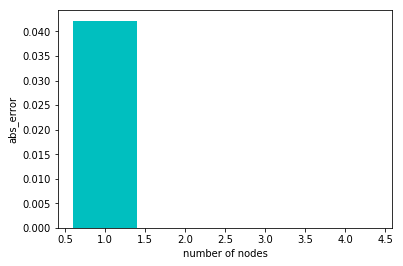

In [63]:
plt.bar([1, 2, 3, 4], err, color='c')
plt.xlabel("number of nodes")
plt.ylabel("abs_error");

In [81]:
for N in range(0, 4):
    m = 2 * N + 1
    print("N =", N + 1)
    for j in range(0, m + 1):
        true = (b**(j + 1) - a**(j + 1)) / (j + 1)
        error = abs(gauss(a, b, A[N], t[N]) - true) 
        print ("m =", j, "  err =", error)
        print("------------------------------------------------")


N = 1
m = 0   err = 0.33968285119999997
------------------------------------------------
m = 1   err = 0.24288285119999997
------------------------------------------------
N = 2
m = 0   err = 0.3818295281777777
------------------------------------------------
m = 1   err = 0.2850295281777777
------------------------------------------------
m = 2   err = 0.15983486151111104
------------------------------------------------
m = 3   err = 0.0031247118222221815
------------------------------------------------
N = 3
m = 0   err = 0.38187533824634046
------------------------------------------------
m = 1   err = 0.28507533824634046
------------------------------------------------
m = 2   err = 0.15988067157967378
------------------------------------------------
m = 3   err = 0.0030789017536594354
------------------------------------------------
m = 4   err = 0.2164719462336595
------------------------------------------------
m = 5   err = 0.49747473646299256
----------------------------------

## Задача 6.6.6

In [71]:
# условие задачи
c = np.array([2.5, -2.1, 0, 0.4, 0.5])
a = 1.
b = 1.44
h = b - a

def P(x):
    return 2.5 + -2.1 * x + 0.4 * x**3 + 0.5 * x**4

Integral = 0.821875 #анатилическое решение
A = [[2],
     [1, 1], 
     [0.55555555555556, 0.88888888888888, 0.55555555555556],  
     [0.347854845137454, 0.652145154862546, 0.652145154862546, 0.347854845137454]]
t = [[0],
     [-0.577350269189626, 0.577350269189626],
     [-0.77459666929954, 0, 0.77459666929954],
     [-0.861136311594052, -0.339981043584856, 0.339981043584856, 0.861136311594052]]

In [72]:
def gauss(a, b, A, t):
    summa = np.sum(np.array([A[i] * P((a + b) / 2 + (b - a) / 2. * t[i]) for i in range(len(A))]))
    Int = (b - a) / 2. * summa
    return Int

In [73]:
err = []
for i in range(0, 4):
    result = gauss(a, b, A[i], t[i])
    print ("Число узлов: ", i + 1)
    print("Результат: ", result)
    error = abs(result - Integral)
    print("Абсолютная погрешность: ", error)
    print("---------------------------------------------")
    err.append(error)

Число узлов:  1
Результат:  0.7796828511999999
Абсолютная погрешность:  0.04219214880000011
---------------------------------------------
Число узлов:  2
Результат:  0.8218295281777777
Абсолютная погрешность:  4.54718222223649e-05
---------------------------------------------
Число узлов:  3
Результат:  0.8218753382463404
Абсолютная погрешность:  3.382463403811542e-07
---------------------------------------------
Число узлов:  4
Результат:  0.8218753382399997
Абсолютная погрешность:  3.3823999967541596e-07
---------------------------------------------


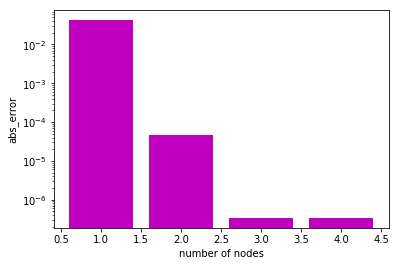

In [76]:
plt.bar([1, 2, 3, 4], err, color='m')
plt.yscale('log')
plt.xlabel("number of nodes")
plt.ylabel("abs_error");

In [82]:
for N in range(0, 4):
    m = 2 * N + 1
    print("N =", N + 1)
    for j in range(0, m + 1):
        true = (b**(j + 1) - a**(j + 1)) / (j + 1)
        error = abs(gauss(a, b, A[N], t[N]) - true) 
        print ("m =", j, "  err =", error)
        print("------------------------------------------------")


N = 1
m = 0   err = 0.33968285119999997
------------------------------------------------
m = 1   err = 0.24288285119999997
------------------------------------------------
N = 2
m = 0   err = 0.3818295281777777
------------------------------------------------
m = 1   err = 0.2850295281777777
------------------------------------------------
m = 2   err = 0.15983486151111104
------------------------------------------------
m = 3   err = 0.0031247118222221815
------------------------------------------------
N = 3
m = 0   err = 0.38187533824634046
------------------------------------------------
m = 1   err = 0.28507533824634046
------------------------------------------------
m = 2   err = 0.15988067157967378
------------------------------------------------
m = 3   err = 0.0030789017536594354
------------------------------------------------
m = 4   err = 0.2164719462336595
------------------------------------------------
m = 5   err = 0.49747473646299256
----------------------------------